# Install TensorFlow on Mac M1/M2 with GPU support
Install TensorFlow in a few steps on Mac M1/M2 with GPU support and benefit <br>
from the native performance of the new Mac Silicon ARM64 architecture.

The article to this project is published on Medium: https://medium.com/@deganza11/install-tensorflow-on-mac-m1-m2-with-gpu-support-c404c6cfb580



## 1. Install Xcode Command Line Tool
If it's not already installed in your system, you can install it by running the following command below in your Mac OSX terminal.

xcode-select --install

## 2. Install the M1 Miniconda Version
Miniconda is the minimal set of features from the extensive Anaconda Python distribution and includes many of the data science related packages that are needed by this class. Download the Miniconda3 macOS Apple M1 64-bit.pkg and install it on your Application directory. <br><br>
<b>Miniconda3 </b> download: https://docs.conda.io/en/latest/miniconda.html

## 2.2 Create Conda environment

**Run the following commands in your terminal**

```conda create -n nak_ml python=3.10 -y```

```conda activate nak_ml```

```conda install notebook -y```

**Then select your environment as this notebook's kernel**

*Note: if your kernel is not being detected press cmd + shift + p and type 'reload window' to restart the vscode window*

## 3. Install TensorFlow

### Install the TensorFlow dependencies:

```conda install -c apple tensorflow-deps -y```

### Install base TensorFlow and Metal plugin:

```pip install tensorflow tensorflow-metal```

##  4. Install Jupyter Notebook and common packages

Install first Jupyter Notebook:

```conda install notebook -y```

**Now install common additional packages and upgrade the packages so that they are updated to the M1 architecture.**

```conda install numpy pandas matplotlib scikit-learn plotly -y```

```pip install gitpython python-dotenv```

## 5. Check GPU availability

### IMPORTANT: Restart your kernel once before running the checks

In [1]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.6.1-arm64-arm-64bit
Tensor Flow Version: 2.17.0
Keras Version: 3.5.0

Python 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:51:49) [Clang 16.0.6 ]
Pandas 2.2.2
Scikit-Learn 1.5.1
SciPy 1.13.1
GPU is available


# 6. Test GPU in Model training

*You can check that by opening Activity Monitor, then pressing Cmd + 3 and Cmd + 4, which shows you GPU and CPU usage.*

In [ ]:
import tensorflow as tf

cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
Wmodel.fit(x_train, y_train, epochs=5, batch_size=64)

**When you now open the activity monitor as described above you should see similar load on the GPU**

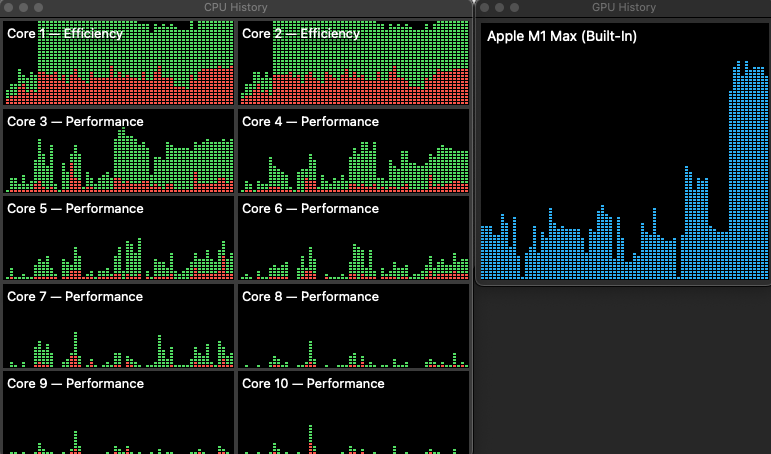